# Laboratorio 5
### Integrantes:
- Paola Contreras, 20213
- Paola de León, 20361

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

El archivo UK_foods.csv contiene datos del consumo, en gramos, por persona
por semana de diferentes comidas en cuatro países del Reino Unido.

## Exploración de data

In [2]:
data = pd.read_csv("./UK_foods.csv")
data.head()

,Product,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    17 non-null     object
 1   England    17 non-null     int64 
 2   Wales      17 non-null     int64 
 3   Scotland   17 non-null     int64 
 4   N.Ireland  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 808.0+ bytes


In [4]:
data.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


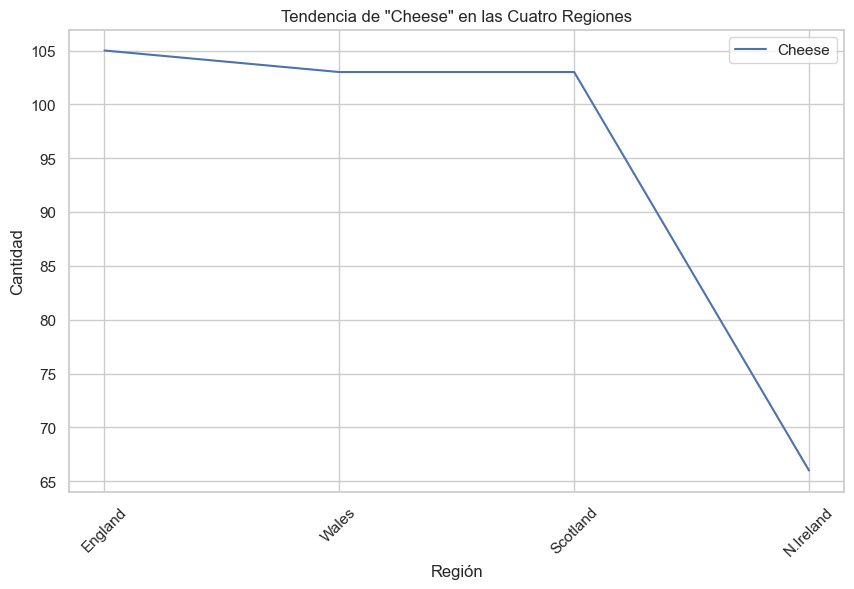

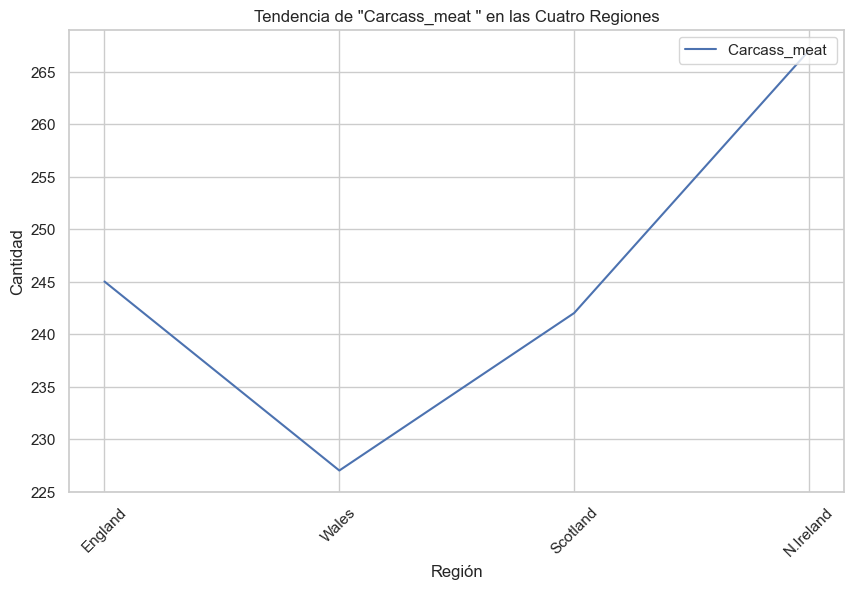

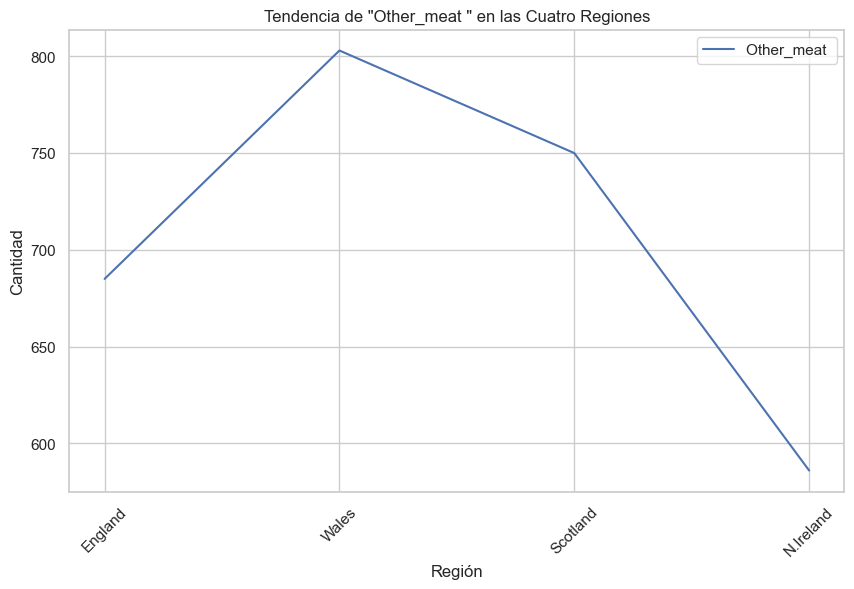

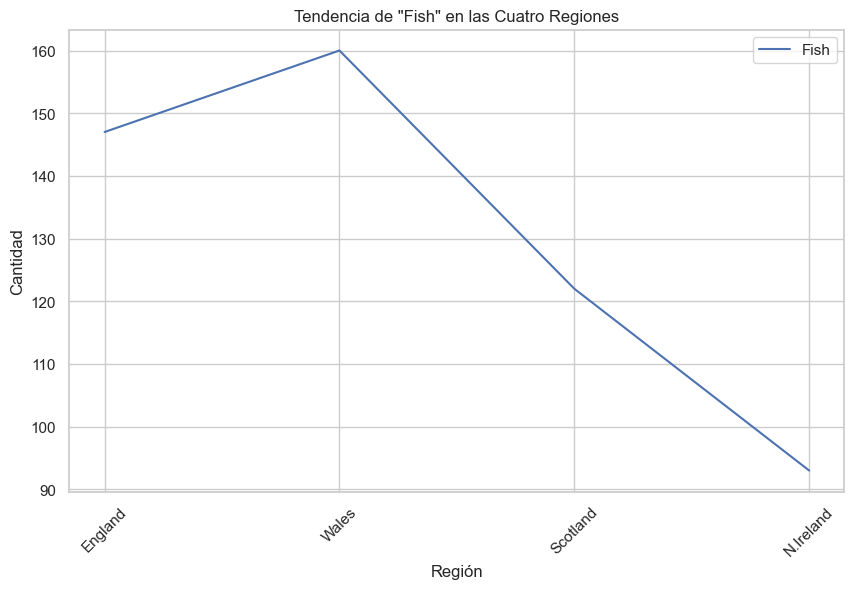

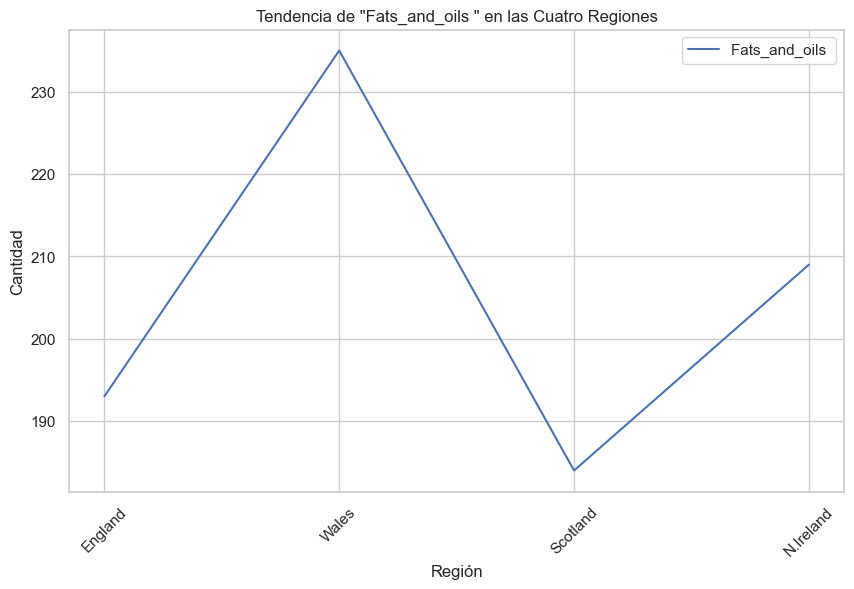

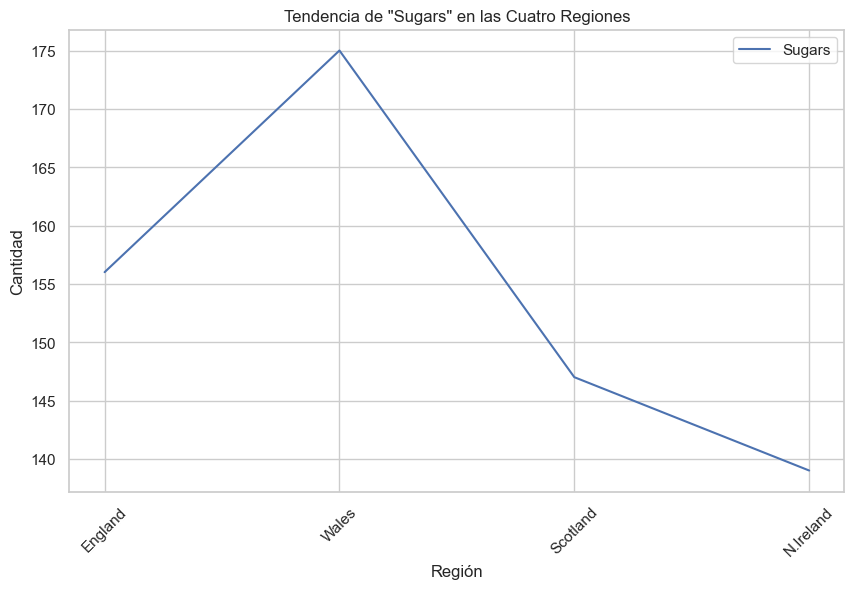

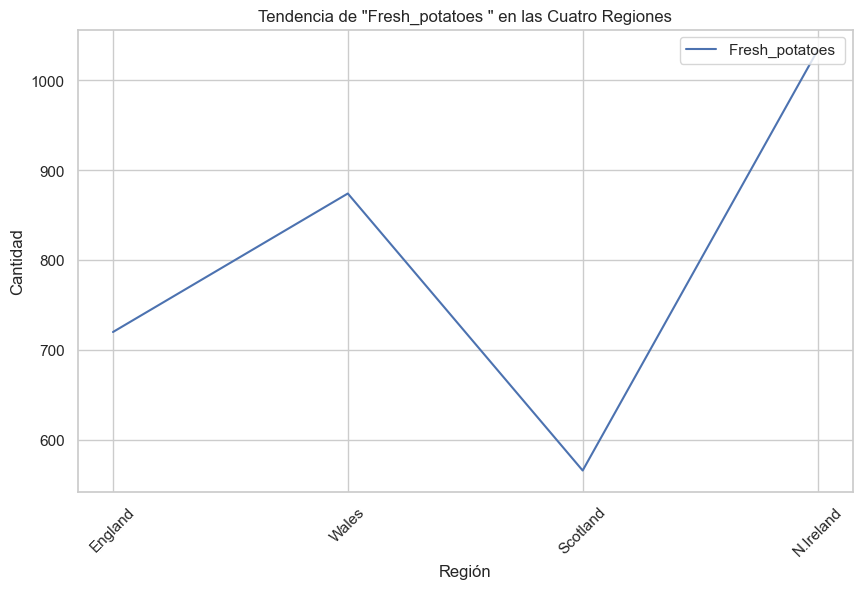

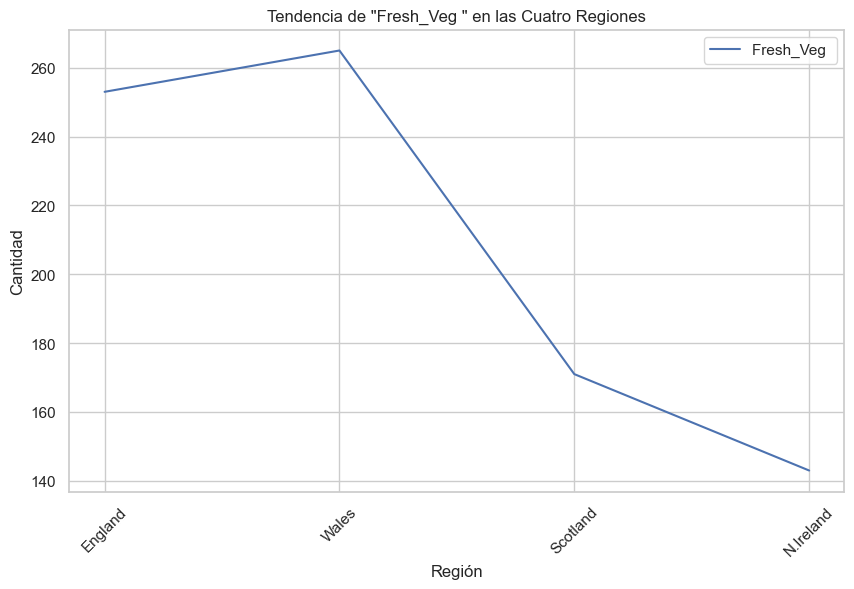

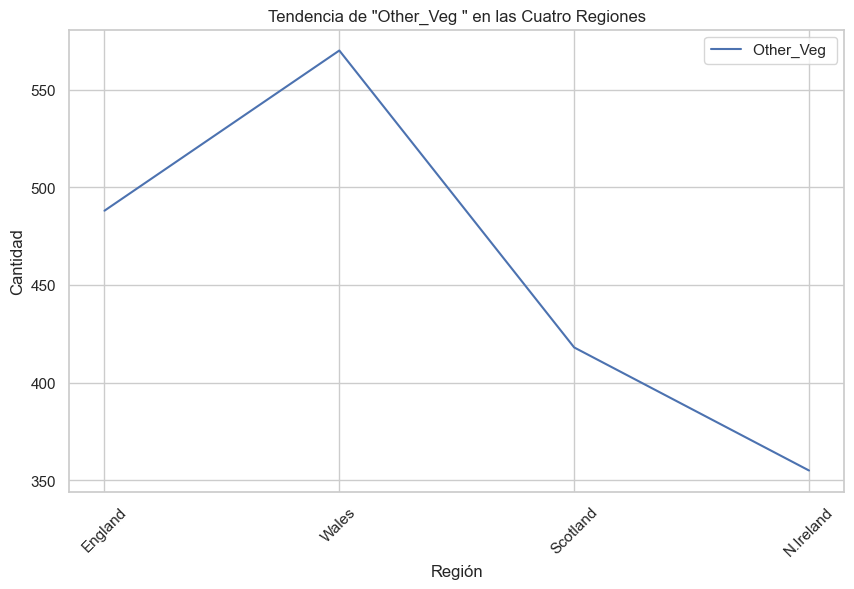

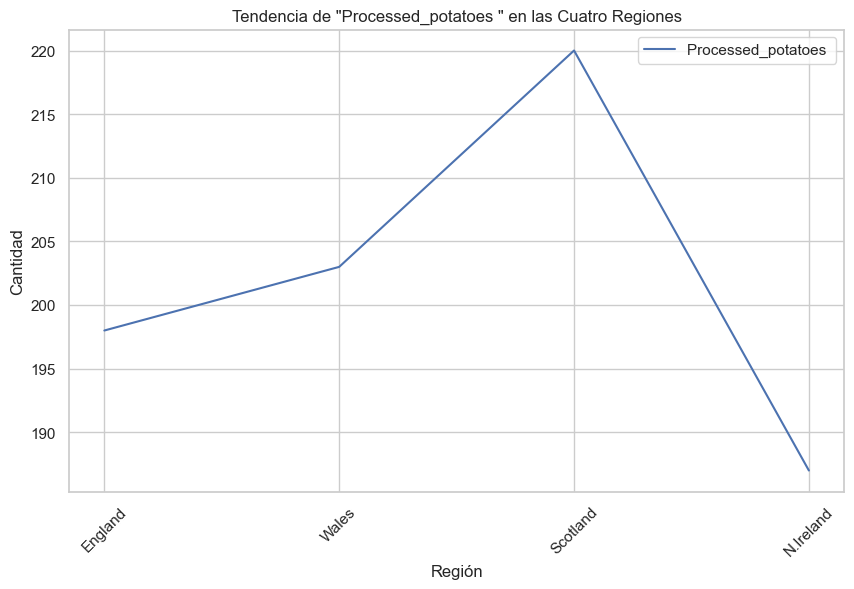

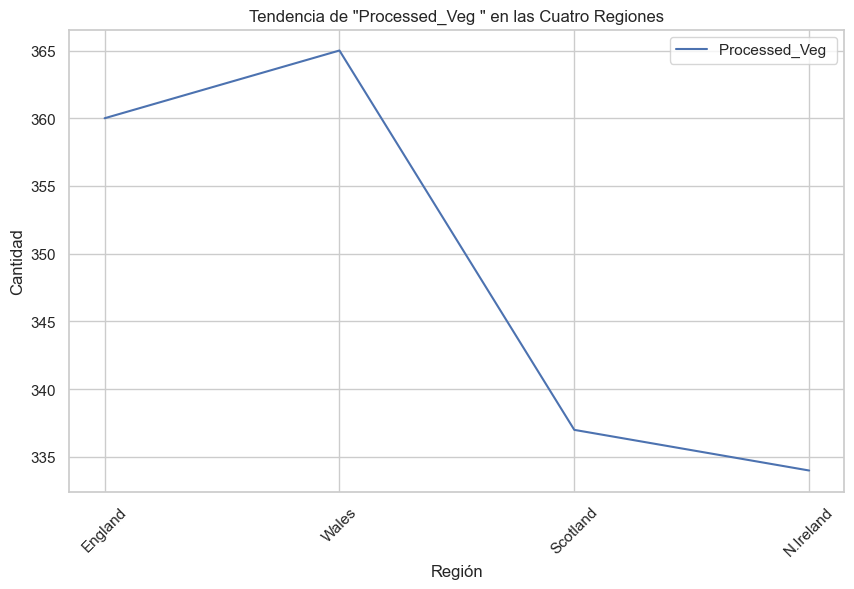

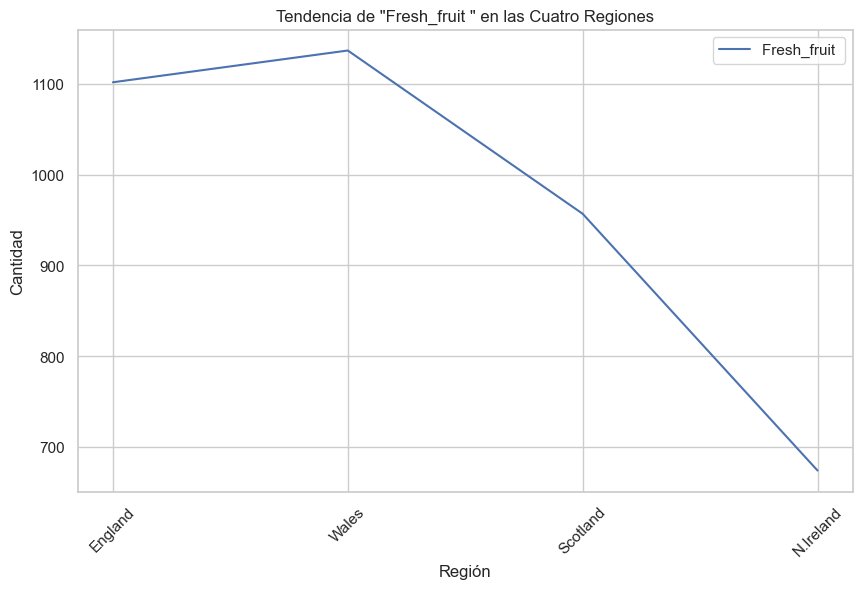

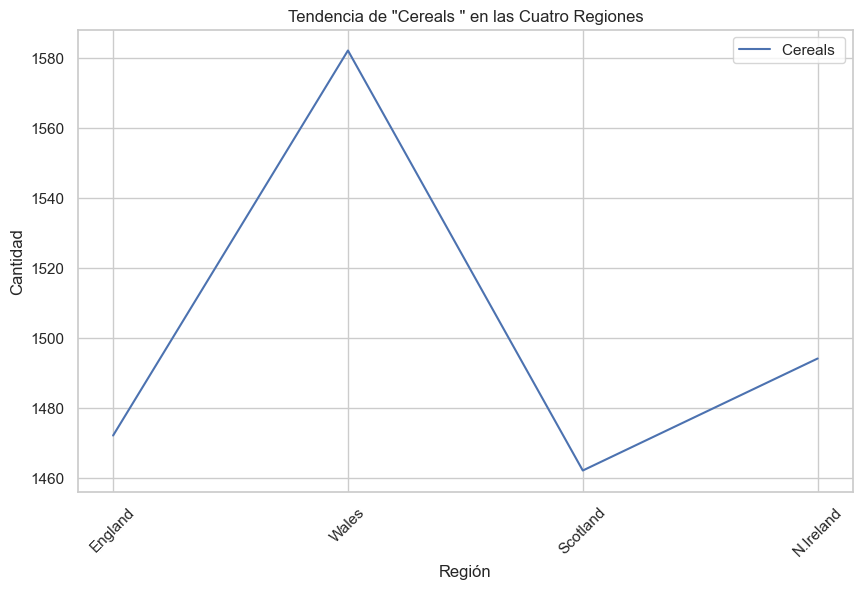

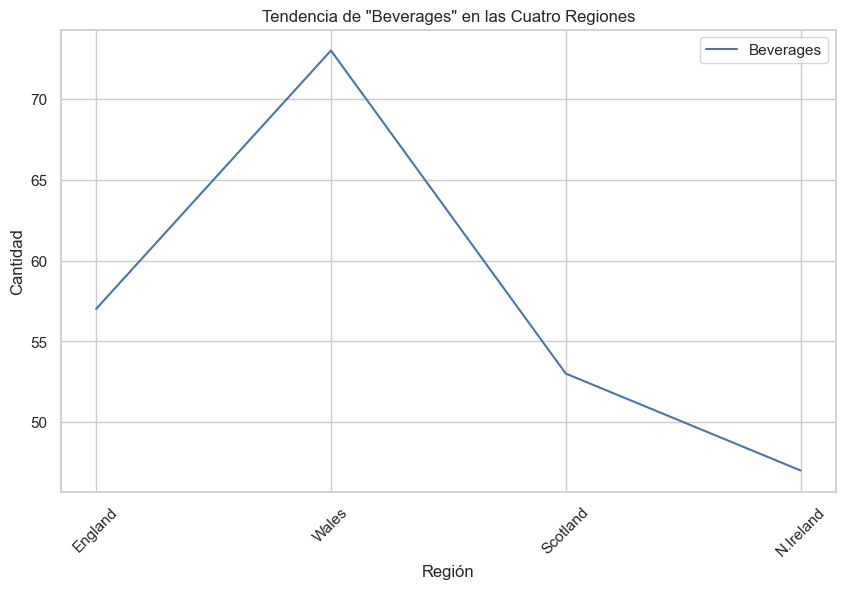

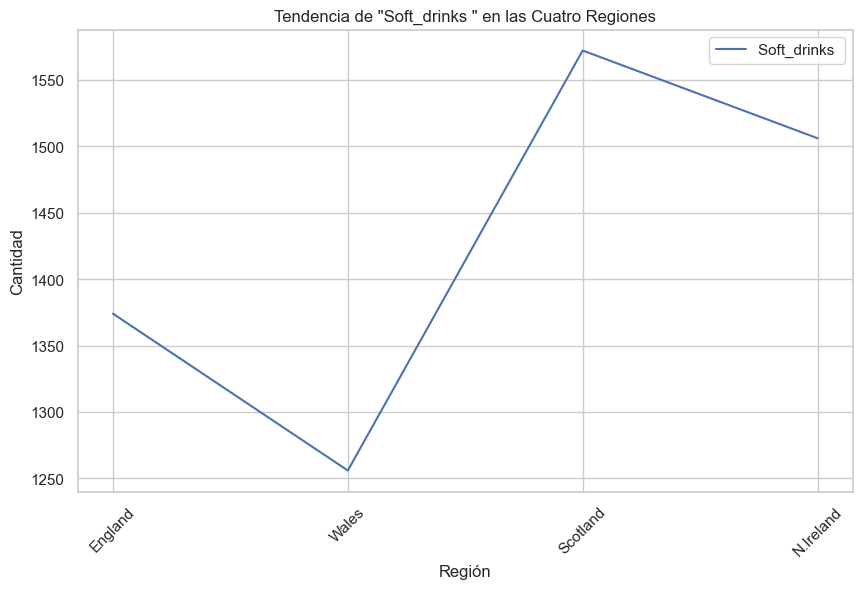

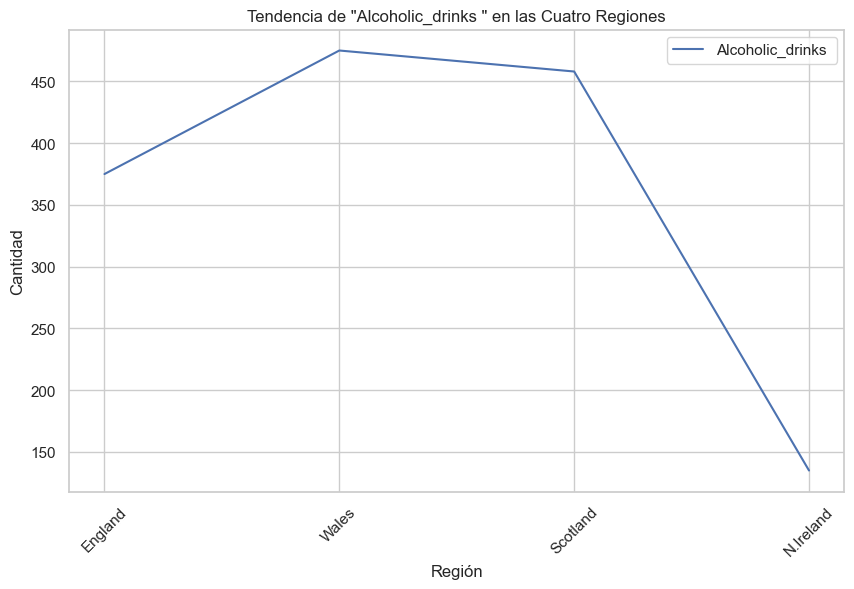

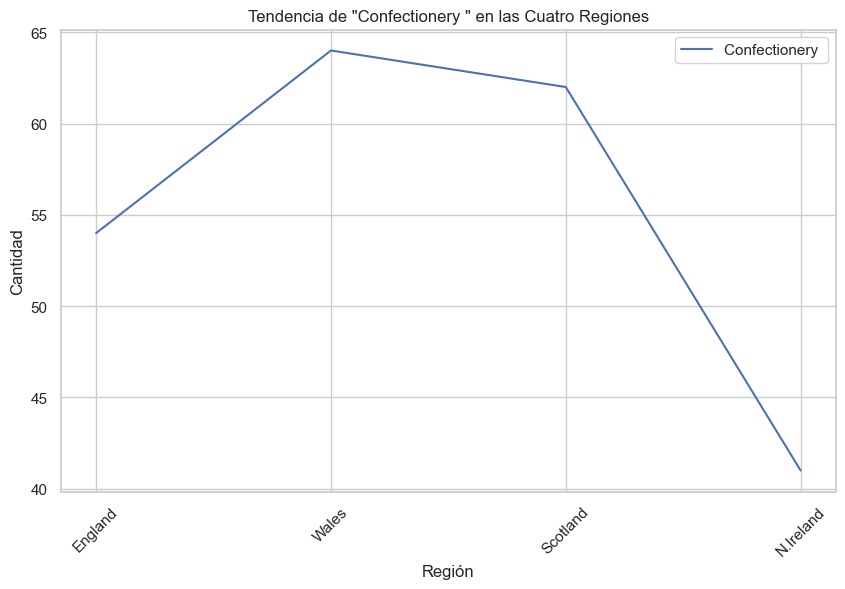

In [5]:
# Obtener la lista de productos únicos
productos = data['Product'].unique()

# Iterar a través de cada producto y crear un gráfico de líneas para cada uno
for product in productos:
    product_data = data[["Product", "England", "Wales", "Scotland", "N.Ireland"]]
    product_data = product_data.melt(id_vars=["Product"], var_name="Region", value_name="Cantidad")

    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    sns.lineplot(x="Region", y="Cantidad", data=product_data[product_data["Product"] == product], label=product)

    plt.title(f'Tendencia de "{product}" en las Cuatro Regiones')
    plt.xlabel('Región')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

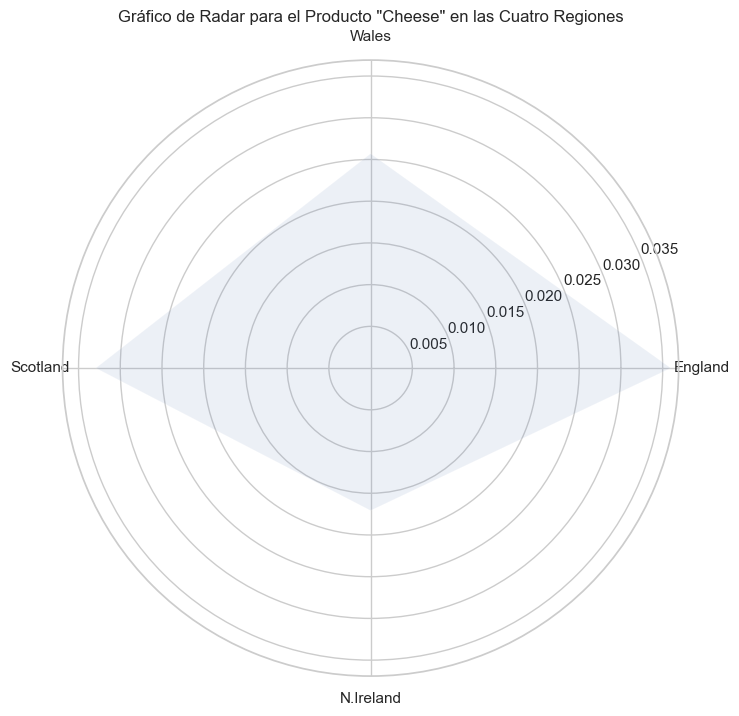

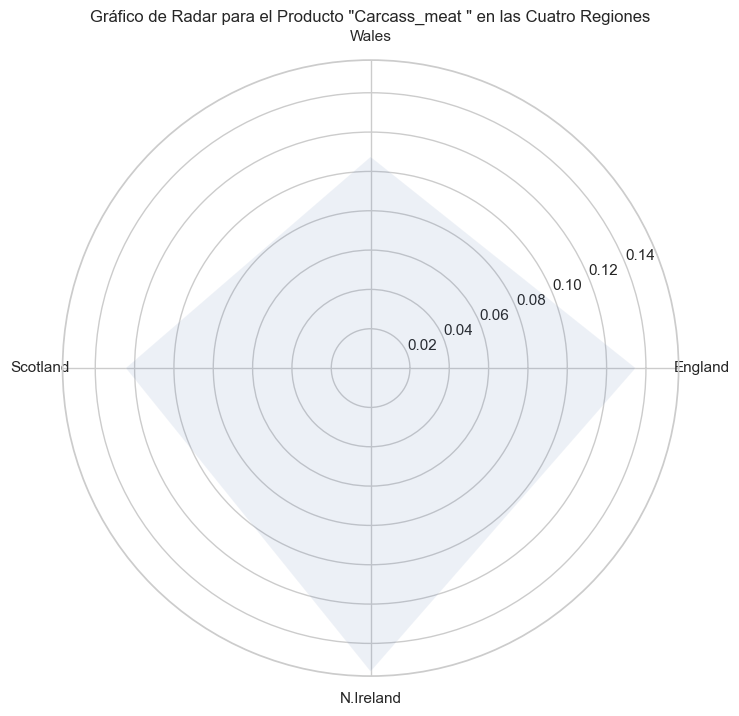

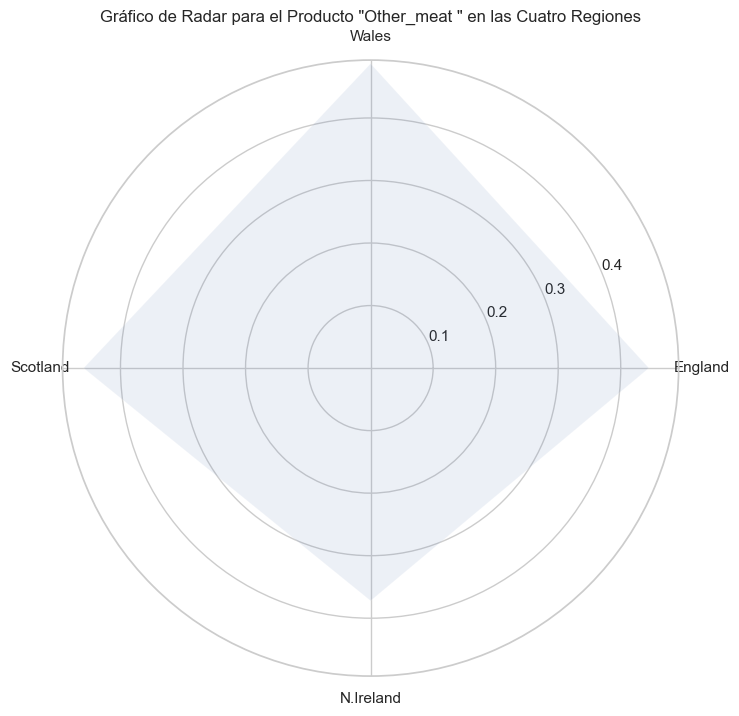

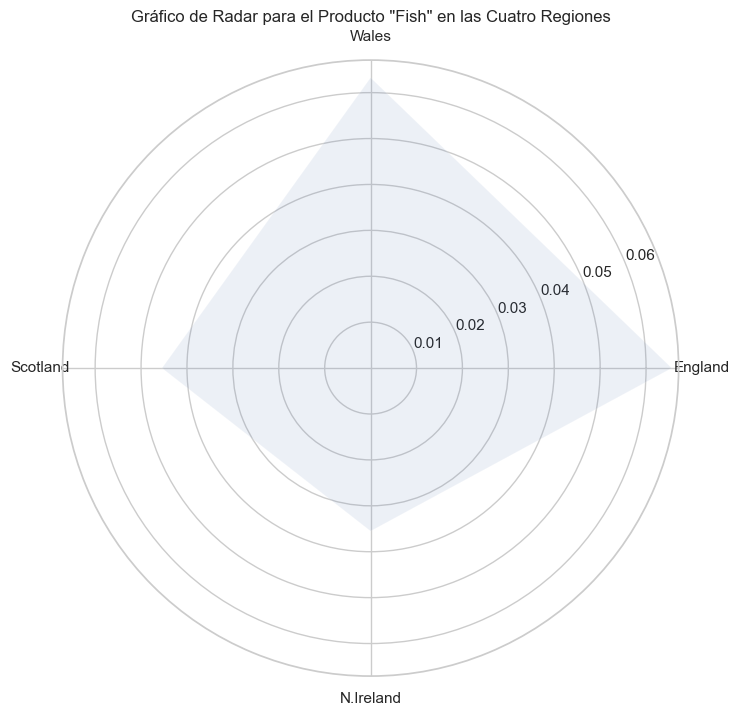

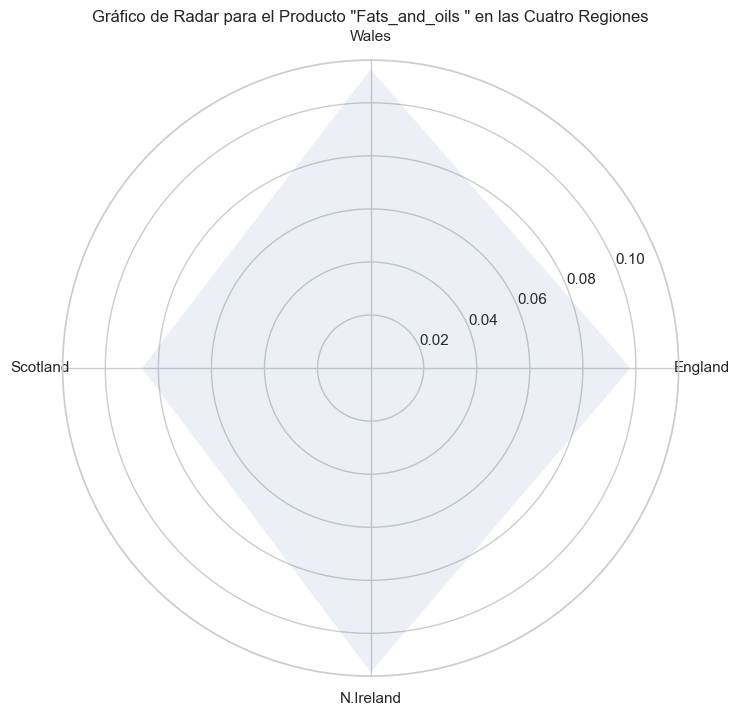

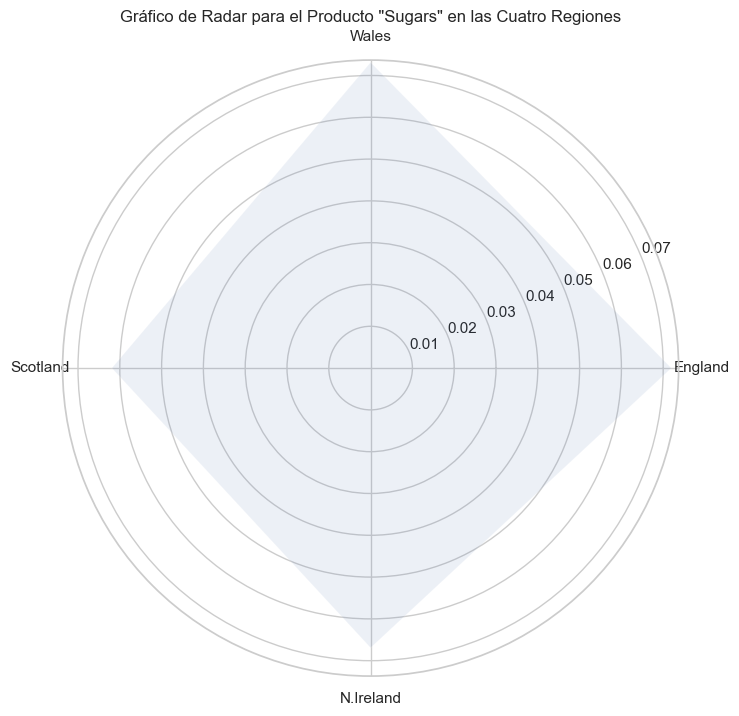

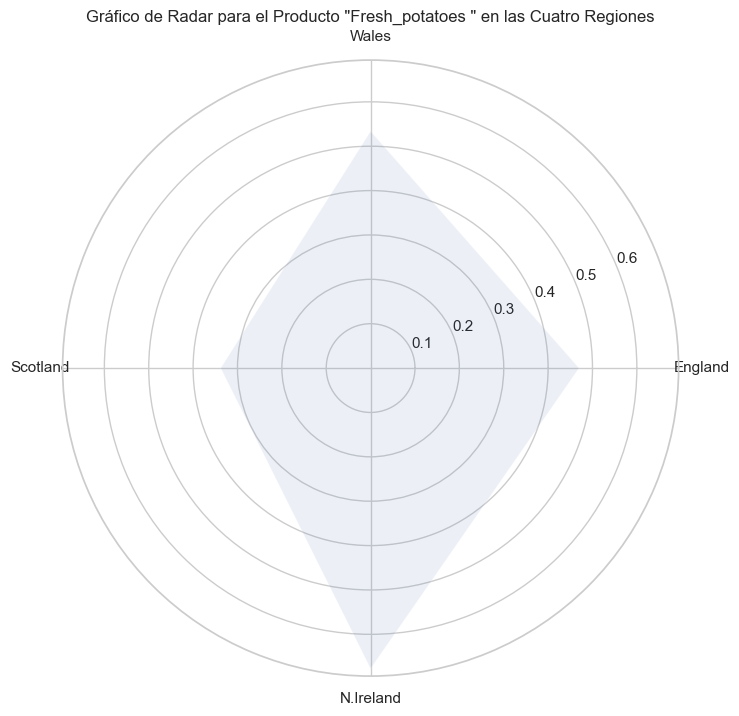

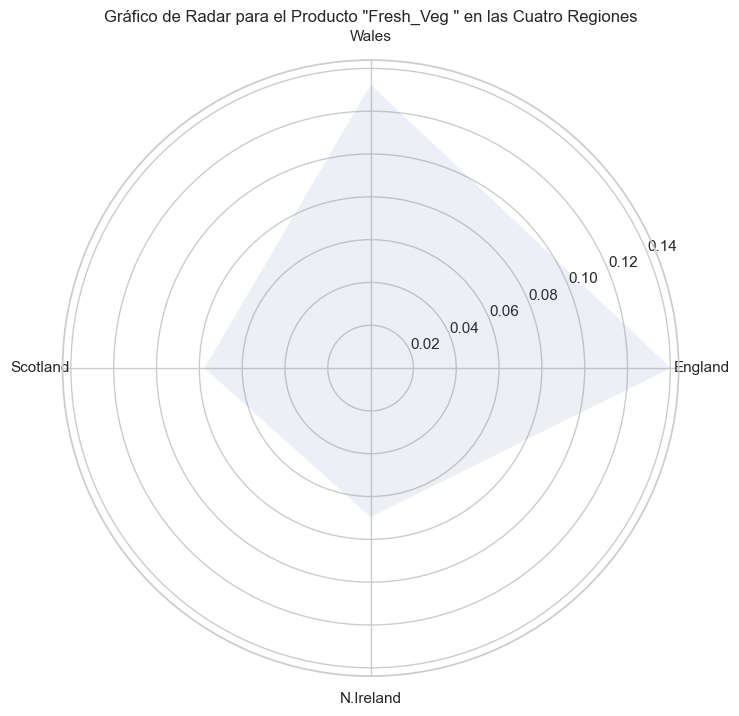

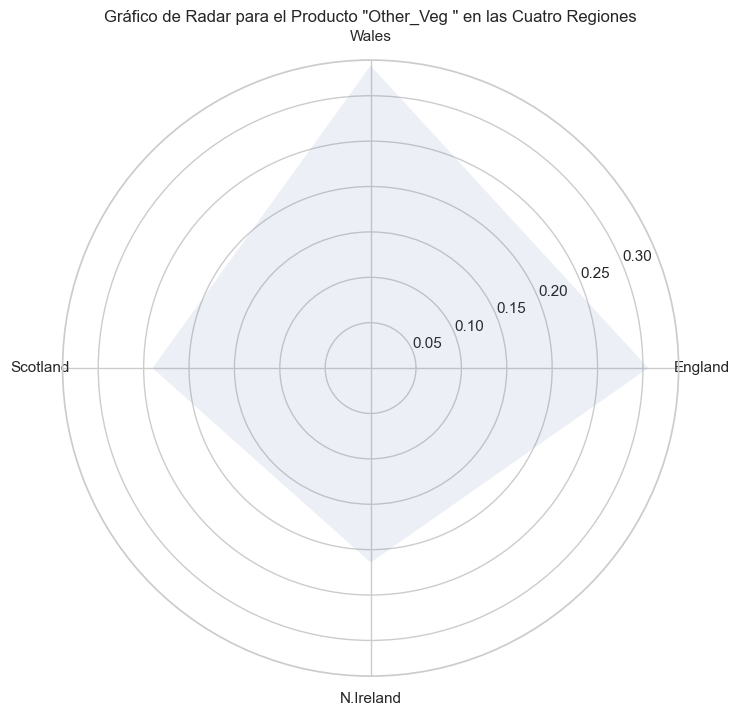

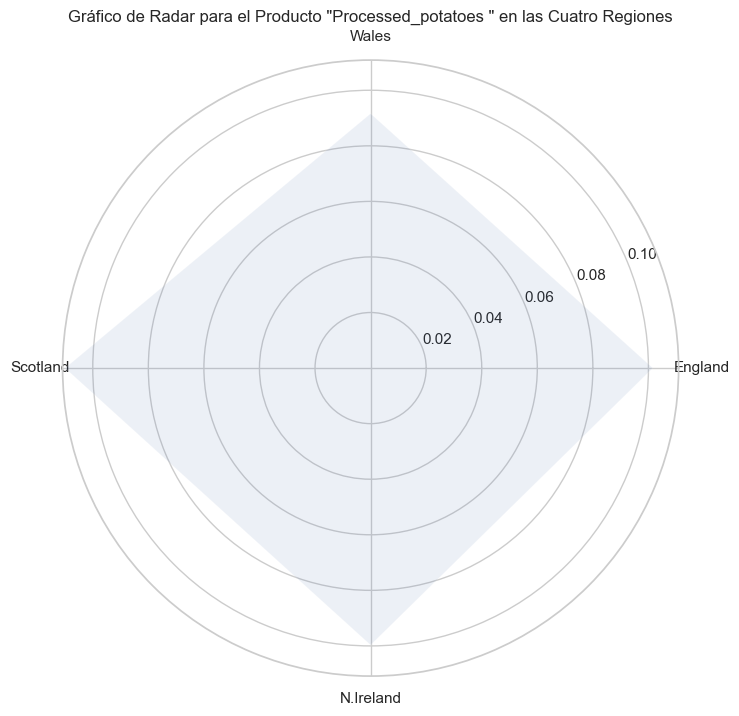

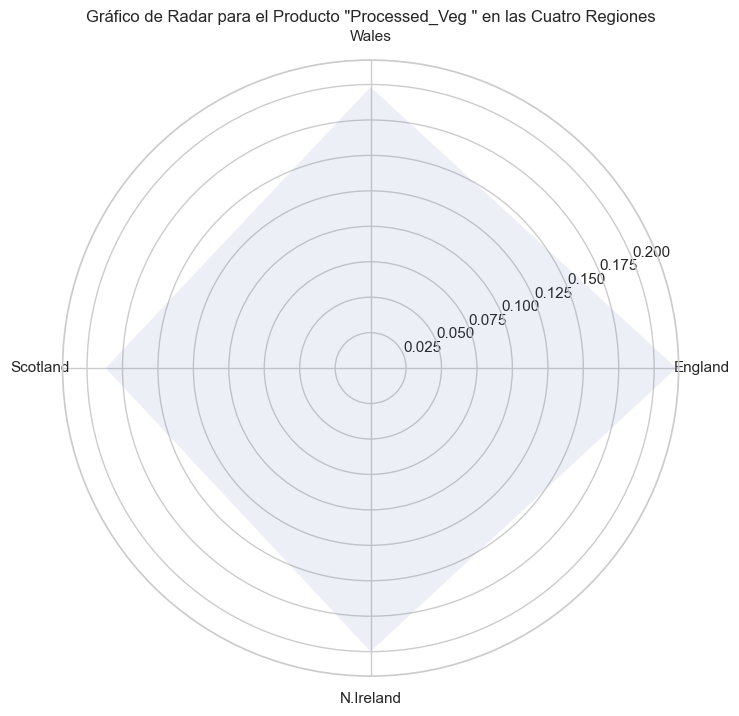

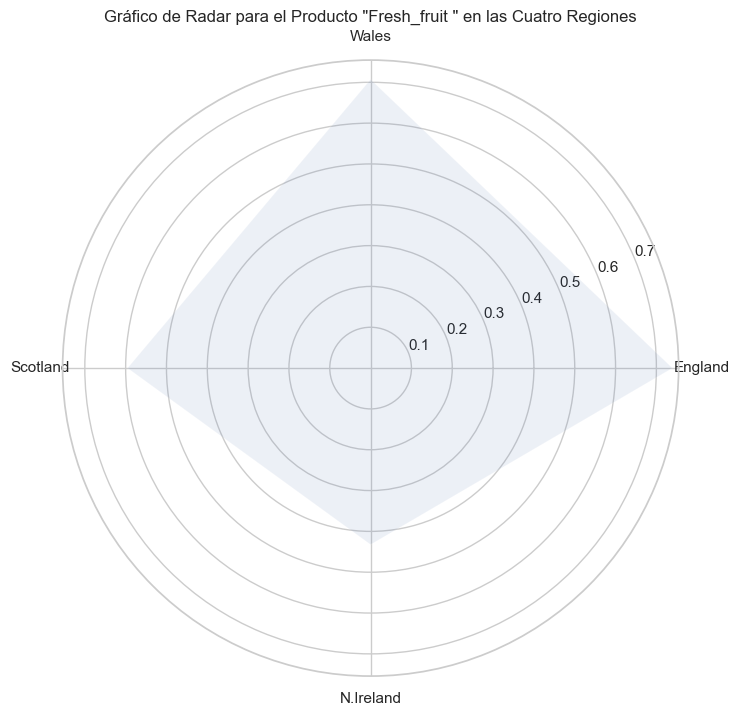

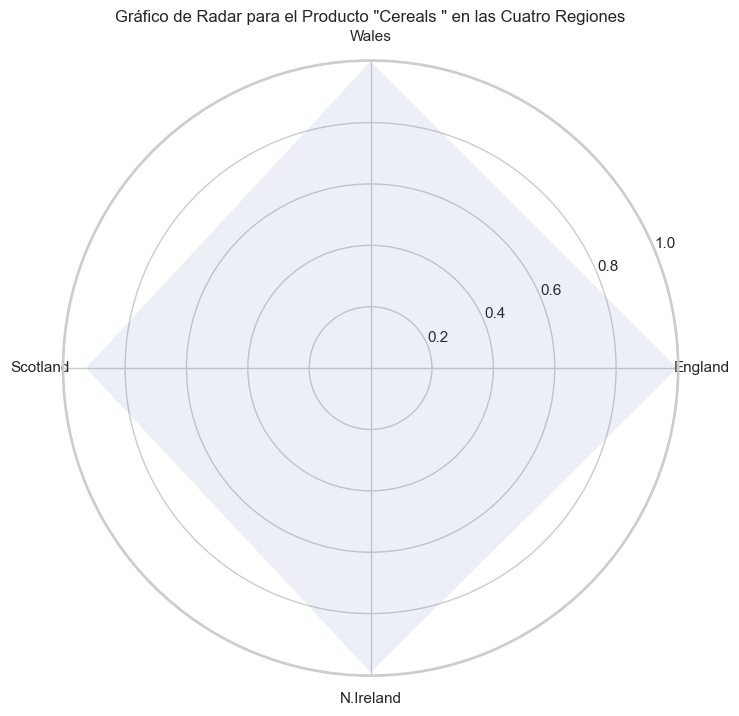

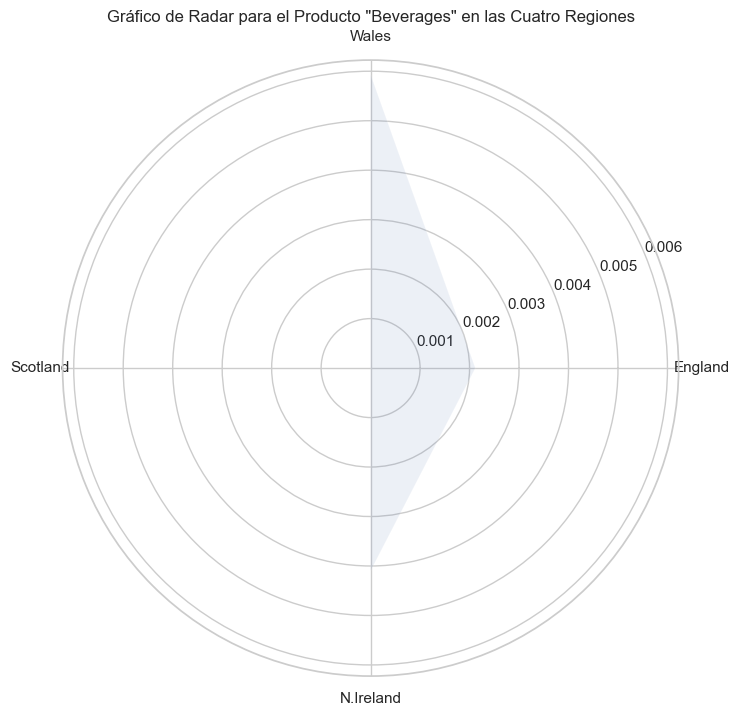

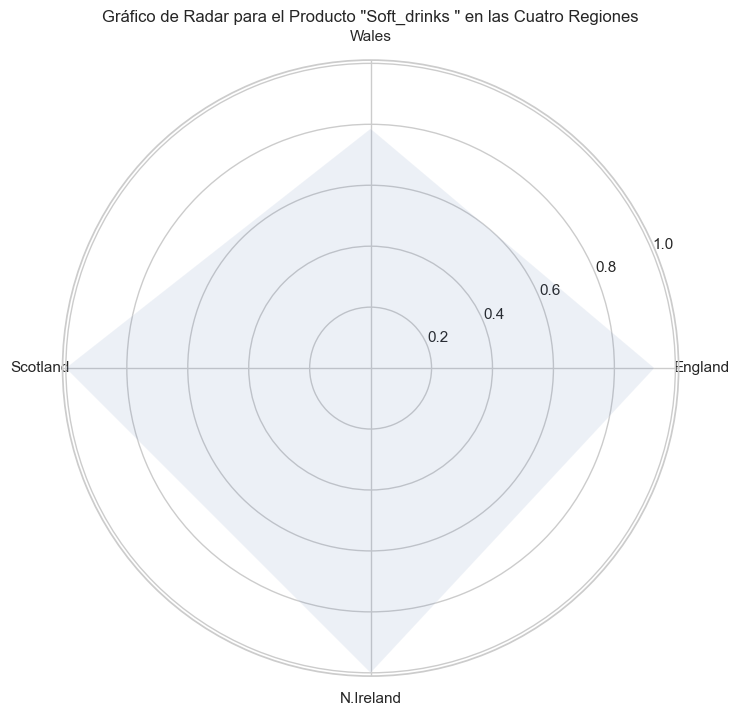

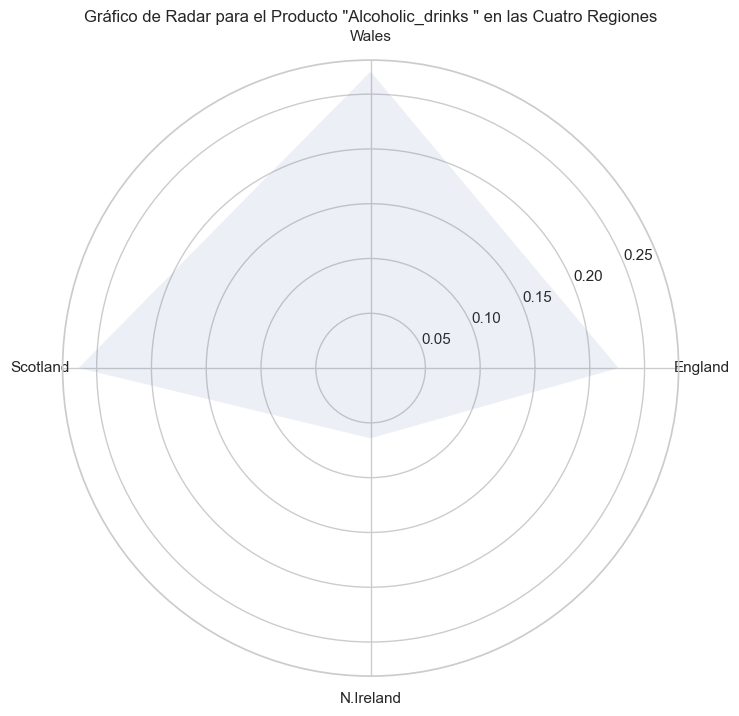

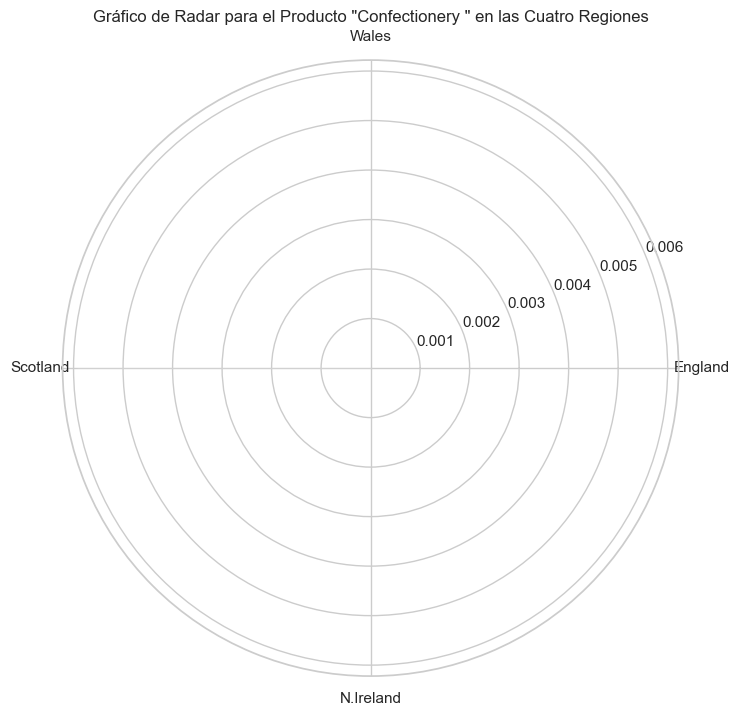

In [10]:
df = pd.DataFrame(data)

# Seleccionar las columnas numéricas para el gráfico de radar
columns = ["England", "Wales", "Scotland", "N.Ireland"]

# Iterar a través de cada producto y crear un gráfico de radar
for product in df["Product"]:
    # Crear un array de valores para cada región
    values = df.loc[df["Product"] == product, columns].values.flatten().tolist()

    # Crear un array de nombres de regiones
    regions = columns

    # Calcular el ángulo de cada eje
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()

    # Agregar el primer valor al final para cerrar el gráfico
    values += values[:1]
    angles += angles[:1]

    # Crear la figura y el eje polar
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # Dibujar el gráfico de radar
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(regions)

    # Mostrar el título del producto en el gráfico
    plt.title(f'Gráfico de Radar para el Producto "{product}" en las Cuatro Regiones')

    # Mostrar el gráfico de radar
    plt.show()

## Normalización de datos

In [7]:
columns_to_normalize = data.columns.difference(['Product'])
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [8]:
data

,Product,England,Wales,Scotland,N.Ireland
0,Cheese,0.035966,0.025692,0.032916,0.017065
1,Carcass_meat,0.134697,0.107378,0.124424,0.154266
2,Other_meat,0.444993,0.486825,0.458855,0.372014
3,Fish,0.065585,0.063241,0.045425,0.035495
4,Fats_and_oils,0.098025,0.112648,0.086241,0.114676
5,Sugars,0.071932,0.073123,0.061883,0.066894
6,Fresh_potatoes,0.469676,0.533597,0.337722,0.677133
7,Fresh_Veg,0.140339,0.132411,0.077683,0.069625
8,Other_Veg,0.306065,0.333333,0.240290,0.214334
9,Processed_potatoes,0.101551,0.091568,0.109941,0.099659


## Contrucción de Autocodificador

In [9]:
# Reducción de dimensiones (2)